#### <b><code>Guassian Transformation</code></b>
<pre>Some machine learning algorithms like linear and logistic assume that the features are normally distributed 
    -Accuracy 
    -Performance

1. logarithmic transformation
2. reciprocal transformation
3. square root transformation
4. exponential transformation (more general, you can use any exponent)
5. boxcox transformation</pre>

In [138]:
import pandas as pd
import scipy.stats as stat
import pylab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer,PowerTransformer

df=pd.read_csv('../titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [139]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [140]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [141]:
# If you want to check whether feature is guassian or normal distributed
# Q-Q plot use to chack whether data is guassianly distributdistributed 
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.title(f'Histogram of {feature}')
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.title("Q-Q Plot")
    plt.show()

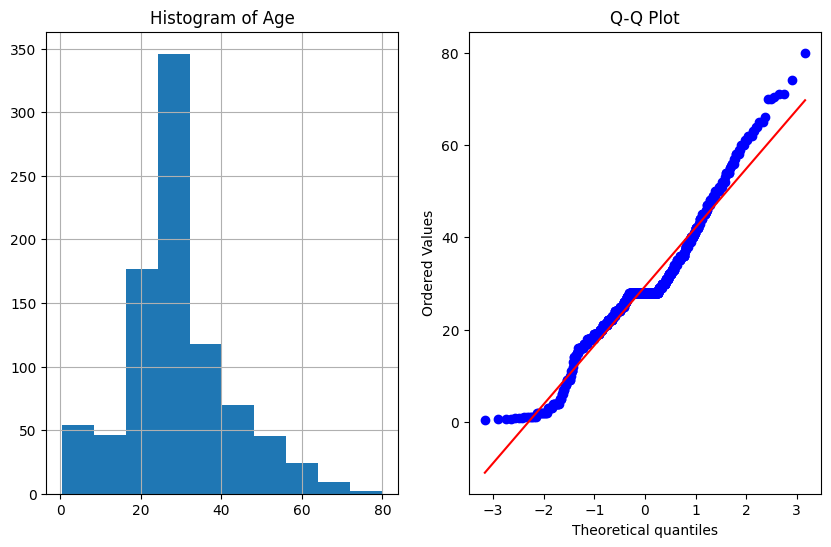

In [142]:
plot_data(df,'Age')

#### <b><code>Logarithmic Transformation</code></b>
<pre>It perform well when our dataset follow log normal distribution (Right Skewed)
formula : y=log(x)</pre>


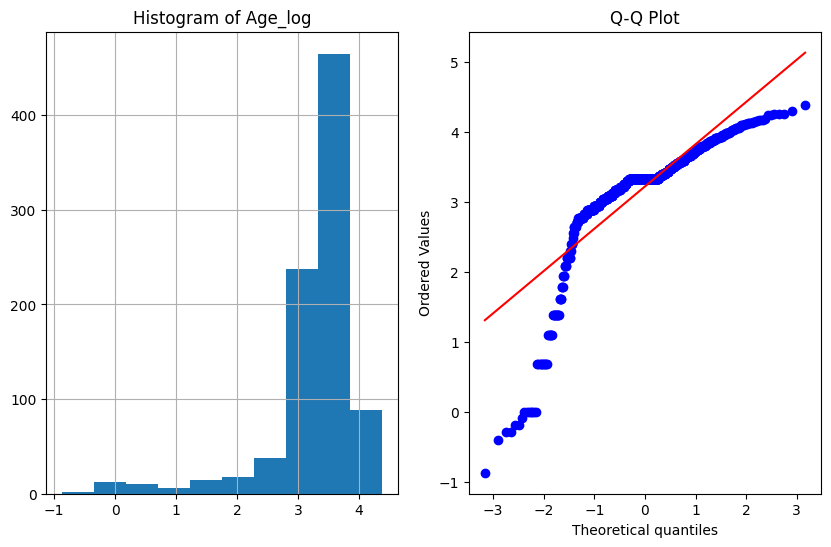

In [143]:
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

#### <b><code>Reciprocal Trnasformation</code></b>
<pre>In this transformation, x will replace by the inverse of x (1/x).
The reciprocal transformation will give little effect on the shape of the distribution. This transformation can be only used for non-zero values.</pre>

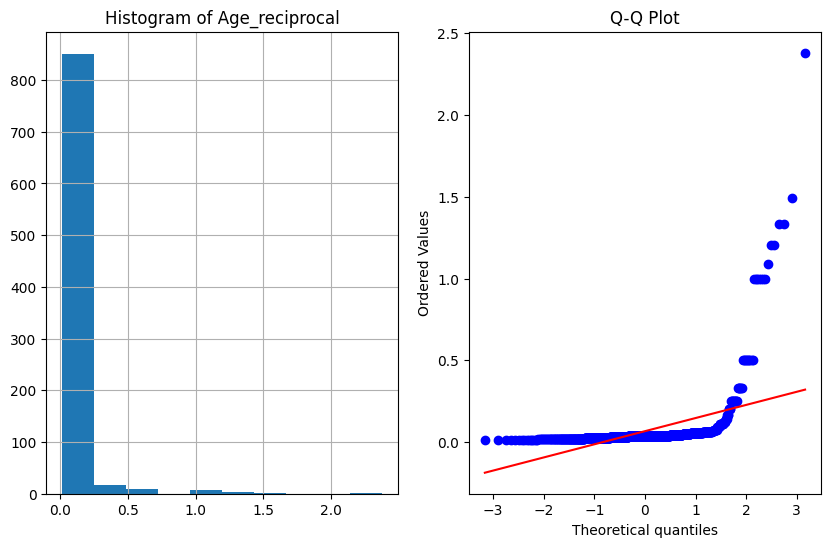

In [144]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

#### <b><code>Square Root Transformation </code></b>
<pre>The square root transformation is a type of data transformation used to stabilize variance and normalize data that exhibits right-skewed distributions or count data.
    
When to Use Square Root Transformation
1. Right-skewed data: Apply square root transformation to compress large values and make the distribution more symmetric.</pre>

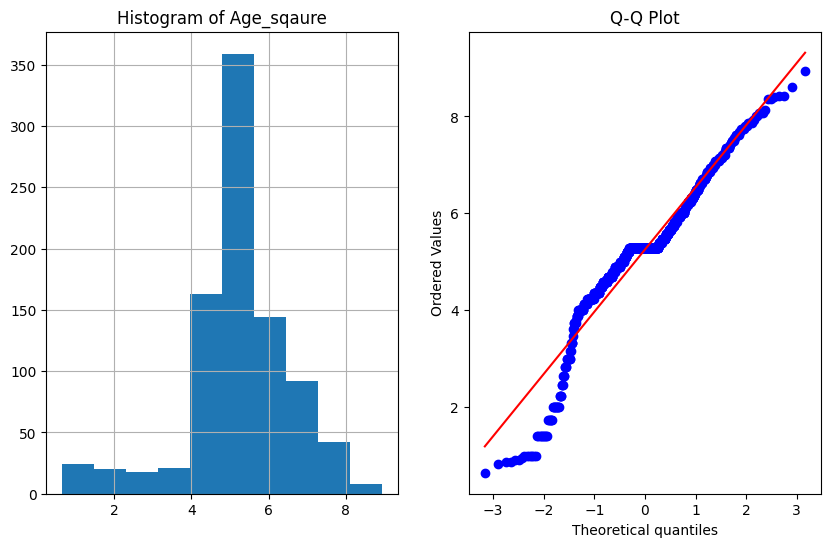

In [145]:
df['Age_sqaure']=np.sqrt(df["Age"])
plot_data(df,'Age_sqaure')

#### <b><code>Exponential Transformation </code></b>

<pre>y = e<sup>1/2</sup></pre>

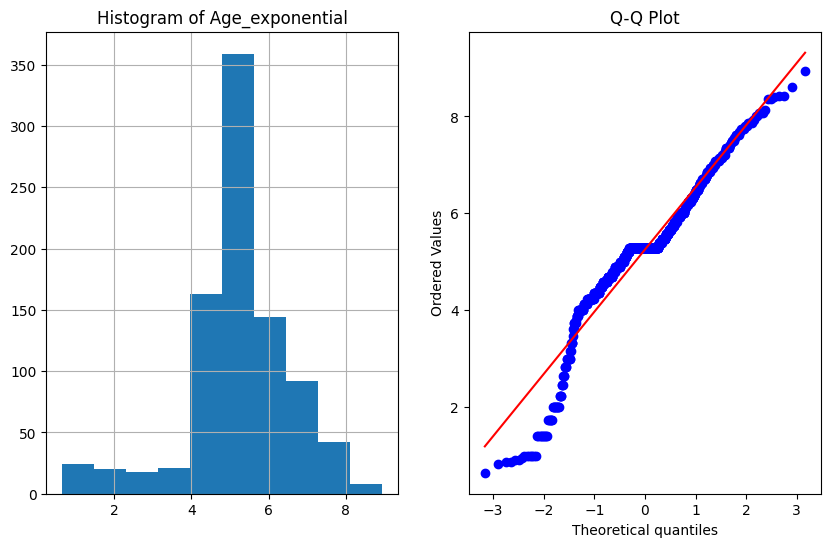

In [146]:
df['Age_exponential']=df.Age**(1/2)
plot_data(df,'Age_exponential')

#### <b><code>Box-Cox Transformation</code></b>
<pre>The Box-Cox transformation is defined as:

T(Y)= y<sup>λ</sup>-1 / λ

y = -3,-2,-1,-0.5,0,0.5,1,2,3 
    
where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.</pre>

In [147]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])
parameters

np.float64(0.796453129010849)

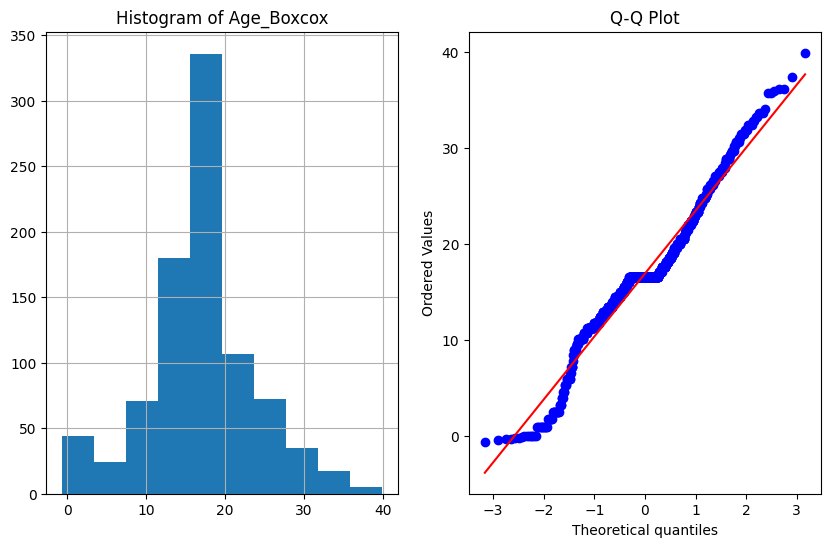

In [148]:
plot_data(df,'Age_Boxcox')

#### <b><code>Yeo - Johnson Transformation </code></b>
<pre>The Yeo-Johnson transformation is used for data normalization, and it can handle both positive and negative values (unlike Box-Cox, which only works with strictly positive values). This transformation is useful for making data more normally distributed and stabilizing variance, especially when you have features with negative or zero values.</pre>

In [149]:
pt = PowerTransformer(method='yeo-johnson')   # Defau is Yoe Johnson Transformation

In [150]:
df["Age_Yoe_Johnson"] = pt.fit_transform(df[["Age"]])

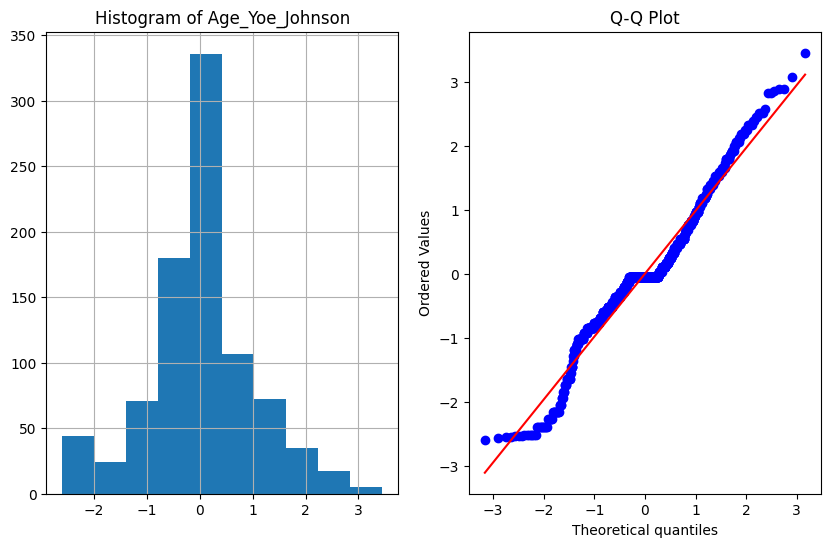

In [151]:
plot_data(df,"Age_Yoe_Johnson")